# Optional Lab: Gradient Descent for Linear Regression

<figure>
    <center> <img src="./images/C1_W1_L4_S1_Lecture_GD.png"  style="width:800px;height:200px;" ></center>
</figure>

## Objetivos
En este laboratorio, usted:
- automatizar el proceso de optimización de $w$ y $b$ utilizando el descenso de gradiente.

## Herramientas
En este laboratorio, haremos uso de: 
- NumPy, una popular librería para la computación científica
- Matplotlib, una popular biblioteca para trazar datos
- rutinas de trazado en el archivo lab_utils.py en el directorio local

In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [2]:
np.__version__

'1.22.3'

<a name="toc_40291_2"></a>
# Planteamiento del problema

Utilicemos los mismos dos puntos de datos que antes: una casa de 1.000 pies cuadrados vendida por 300.000 dólares y una casa de 2.000 pies cuadrados vendida por 500.000 dólares.

| Tamaño (1000 pies cuadrados) | Precio (miles de dólares) |
| ----------------| ------------------------ |
| 1 | 300 |
| 2 | 500 |


In [3]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

<a name="toc_40291_2.0.1"></a>
### Compute_Cost
This was developed in the last lab. We'll need it again here.

In [4]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

<a name="toc_40291_2.1"></a>
## Gradient descent summary
Hasta ahora en este curso, has desarrollado un modelo lineal que predice $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
En la regresión lineal, se utilizan los datos de entrenamiento de entrada para ajustar los parámetros $w$,$b$ minimizando una medida del error entre nuestras predicciones $f_{w,b}(x^{(i)})$ y los datos reales $y^{(i)}$. La medida se llama el $cost$, $J(w,b)$. En el entrenamiento se mide el coste sobre todas nuestras muestras de entrenamiento $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 


En la conferencia, el *descenso gradual* se describió como:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
donde, los parámetros $w$, $b$ se actualizan simultáneamente.  
El gradiente se define como:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4} \newline
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) 
\end{align}
$$

Aquí *simultáneamente* significa que se calculan las derivadas parciales de todos los parámetros antes de actualizar cualquiera de ellos.

<a name="toc_40291_2.2"></a>
## Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions. 
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above (code from previous lab)
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.

## Implementar el descenso de gradiente
Implementarás el algoritmo de descenso de gradiente para una característica. Necesitarás tres funciones. 
- `compute_gradient` implementando la ecuación (4) y (5) anterior
- `compute_cost` implementando la ecuación (2) anterior (código del laboratorio anterior)
- `gradient_descent`, utilizando compute_gradient y compute_cost

Convenciones:
- La nomenclatura de las variables de python que contienen derivadas parciales sigue este patrón, $\frac{\partial J(w,b)}{\partial b}$ será `dj_db`.
- w.r.t es Con respecto a, como en derivada parcial de $J(wb)$ con respecto a $b$.

<a name="toc_40291_2.3"></a>
### compute_gradient
<a name='ex-01'></a>
`compute_gradient` implementa (4) y (5) anteriores y devuelve $\frac{parcial J(w,b)}{parcial w}$,$\frac{parcial J(w,b)}{parcial b}$. Los comentarios incrustados describen las operaciones.

In [5]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb    = w * x[i] + b 
        
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        
        dj_db   += dj_db_i
        dj_dw   += dj_dw_i 
    
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

<br/>

<img align="left" src="./images/C1_W1_Lab03_lecture_slopes.PNG"   style="width:340px;" > Tas clases describen cómo el descenso de gradiente utiliza la derivada parcial del coste con respecto a un parámetro en un punto para actualizar ese parámetro.   
Usemos nuestra función `compute_gradient` para encontrar y trazar algunas derivadas parciales de nuestra función de coste respecto a uno de los parámetros, $w_0$.


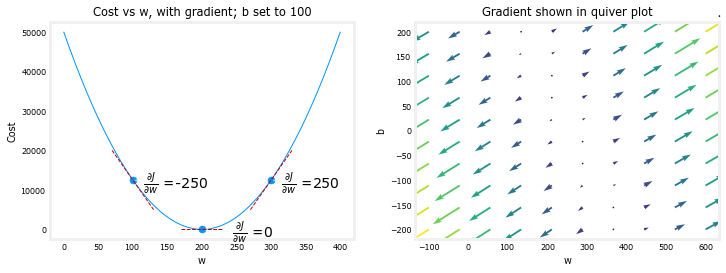

In [6]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

Above, the left plot shows $\frac{\partial J(w,b)}{\partial w}$ or the slope of the cost curve relative to $w$ at three points. On the right side of the plot, the derivative is positive, while on the left it is negative. Due to the 'bowl shape', the derivatives will always lead gradient descent toward the bottom where the gradient is zero.
 
The left plot has fixed $b=100$. Gradient descent will utilize both $\frac{\partial J(w,b)}{\partial w}$ and $\frac{\partial J(w,b)}{\partial b}$ to update parameters. The 'quiver plot' on the right provides a means of viewing the gradient of both parameters. The arrow sizes reflect the magnitude of the gradient at that point. The direction and slope of the arrow reflects the ratio of $\frac{\partial J(w,b)}{\partial w}$ and $\frac{\partial J(w,b)}{\partial b}$ at that point.
Note that the gradient points *away* from the minimum. Review equation (3) above. The scaled gradient is *subtracted* from the current value of $w$ or $b$. This moves the parameter in a direction that will reduce cost.

Arriba, el gráfico de la izquierda muestra $\frac{\partial J(w,b)}{\partial w}$ o la pendiente de la curva de costes en relación con $w$ en tres puntos. En la parte derecha del gráfico, la derivada es positiva, mientras que en la izquierda es negativa. Debido a la "forma de cuenco", las derivadas siempre llevarán el descenso del gradiente hacia la parte inferior, donde el gradiente es cero.  

El gráfico de la izquierda tiene fijo $b=100$. El descenso por gradiente utilizará tanto $\frac{\partial J(w,b)}{\partial w}$ como $\frac{\partial J(w,b)}{\partial b}$ para actualizar los parámetros. El "diagrama de carcaj" de la derecha proporciona un medio para ver el gradiente de ambos parámetros. El tamaño de las flechas refleja la magnitud del gradiente en ese punto. La dirección y la pendiente de la flecha refleja la relación de $\frac{\partial J(w,b)}{\partial w}$ y $\frac{\partial J(w,b)}{\partial b}$ en ese punto.
Nótese que el gradiente apunta *lejos* del mínimo. Revise la ecuación (3) anterior. El gradiente escalado se *resta* del valor actual de $w$ o $b$. Esto mueve el parámetro en una dirección que reducirá el costo.

<a name="toc_40291_2.5"></a>
###  Gradient Descent
Now that gradients can be computed,  gradient descent, described in equation (3) above can be implemented below in `gradient_descent`. The details of the implementation are described in the comments. Below, you will utilize this function to find optimal values of $w$ and $b$ on the training data.

Descenso de gradiente
Ahora que los gradientes pueden ser calculados, el descenso de gradiente, descrito en la ecuación (3) anterior puede ser implementado a continuación en `gradient_descent`. Los detalles de la implementación se describen en los comentarios. A continuación, se utilizará esta función para encontrar los valores óptimos de $w$ y $b$ en los datos de entrenamiento.

In [7]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Realiza el descenso de gradiente para ajustar w,b. Actualiza w,b tomando 
    num_iters pasos de gradiente con tasa de aprendizaje alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples  (Datos m ejemplos)
      y (ndarray (m,))  : target values     (target o valores reales)
      w_in,b_in (scalar): initial values of model parameters   (parametros iniciales de pesos y sesgo)
      alpha (float):     Learning rate     (taza de aprensizaje)
      num_iters (int):   number of iterations to run gradient descent  (cantidad de iterecciones o epocas)
      cost_function:     function to call to produce cost     (Funcion de costo utilizada para el calculo)
      gradient_function: function to call to produce gradient (función a la que llamar para producir el gradiente)
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent  (los pesos actualizados)
      b (scalar): Updated value of parameter after running gradient descent  (los sesgos actualizados)
      J_history (List): History of cost values        (lista con el historial de los costos)
      p_history (list): History of parameters [w,b]   (lista con el historial de los pesos y sesgos de cada epoca)
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in   ???
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [8]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


<img align="left" src="./images/C1_W1_Lab03_lecture_learningrate.PNG"  style="width:340px; padding: 15px; " > 
Dedica un momento a observar algunas características del proceso de descenso por gradiente impreso arriba.  

- El coste empieza siendo grande y disminuye rápidamente como se describe en la diapositiva de la conferencia.
- Las derivadas parciales, `dj_dw`, y `dj_db` también se reducen, rápidamente al principio y luego más lentamente. Como se muestra en el diagrama de la clase, a medida que el proceso se acerca al "fondo del recipiente" el progreso es más lento debido al menor valor de la derivada en ese punto.
- el progreso se ralentiza aunque la tasa de aprendizaje, alfa, permanece fija

Traducción realizada con la versión gratuita del traductor www.DeepL.com/Translator

### Cost versus iterations of gradient descent 
Coste frente a iteraciones del descenso de gradiente   
Un gráfico del coste frente a las iteraciones es una medida útil del progreso en el descenso de gradiente. El coste siempre debería disminuir en las ejecuciones exitosas. El cambio en el coste es tan rápido inicialmente, que es útil trazar el descenso inicial en una escala diferente a la del descenso final. En los gráficos siguientes, observe la escala del coste en los ejes y el paso de iteración.

Traducción realizada con la versión gratuita del traductor www.DeepL.com/Translator

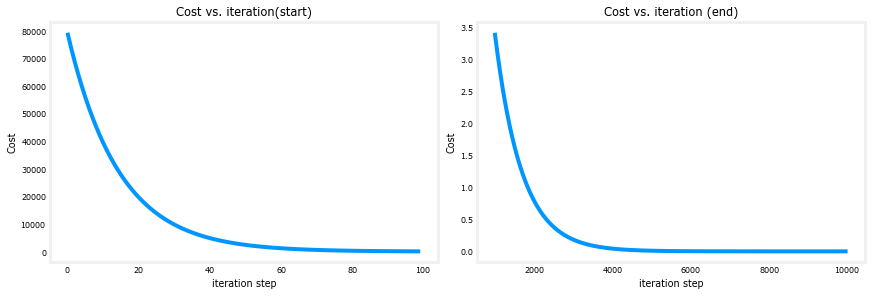

In [10]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

### Predictions
Predicciones  
Ahora que ha descubierto los valores óptimos para los parámetros $w$ y $b$, puede utilizar el modelo para predecir los valores de la vivienda basándose en nuestros parámetros aprendidos. Como era de esperar, los valores predichos son casi iguales a los valores de entrenamiento para la misma vivienda. Además, el valor que no aparece en la predicción coincide con el valor esperado.

In [11]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


<a name="toc_40291_2.6"></a>
## Plotting
Puedes mostrar el progreso del descenso de gradiente durante su ejecución trazando el coste a lo largo de las iteraciones en un gráfico de contorno del coste(w,b).

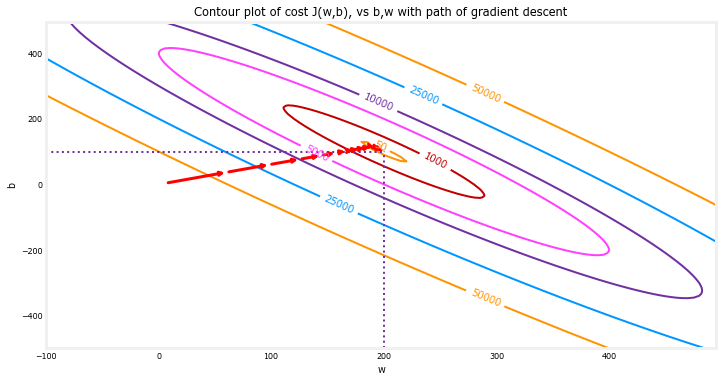

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

Arriba, el gráfico de contorno muestra el $cost(w,b)$ en un rango de $w$ y $b$. Los niveles de coste están representados por los anillos. Superpuesto, con flechas rojas, está el camino del descenso del gradiente. Hay que tener en cuenta algunas cosas:
- La trayectoria progresa de forma constante (monótona) hacia su objetivo.
- Los pasos iniciales son mucho más grandes que los pasos cerca de la meta.

**Al ampliar la imagen**, podemos ver los últimos pasos del descenso del gradiente. Obsérvese que la distancia entre los pasos se reduce a medida que el gradiente se acerca a cero.

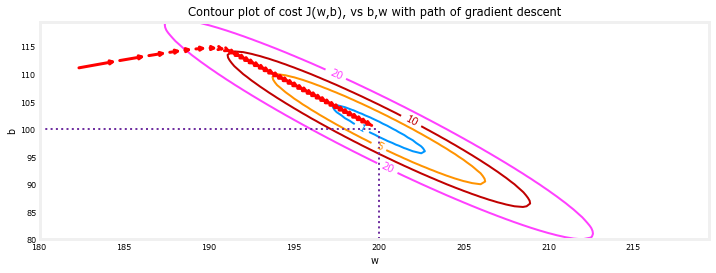

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

<a name="toc_40291_2.7.1"></a>
### Increased Learning Rate

<figure>
 <img align="left", src="./images/C1_W1_Lab03_alpha_too_big.PNG"   style="width:340px;height:240px;" >
</figure>
En la conferencia, hubo una discusión relacionada con el valor adecuado de la tasa de aprendizaje, $\alpha$ en la ecuación(3). Cuanto mayor sea $\alpha$, más rápido convergerá el descenso del gradiente a una solución. Pero, si es demasiado grande, el descenso del gradiente divergirá. Arriba tienes un ejemplo de solución que converge bien.

Probemos a aumentar el valor de $\alpha$ y veamos qué ocurre:

In [14]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteration    0: Cost 2.58e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration    1: Cost 7.82e+05  dj_dw:  1.130e+03, dj_db:  7.000e+02   w: -3.840e+02, b:-2.40000e+02
Iteration    2: Cost 2.37e+06  dj_dw: -1.970e+03, dj_db: -1.216e+03   w:  1.192e+03, b: 7.32800e+02
Iteration    3: Cost 7.19e+06  dj_dw:  3.429e+03, dj_db:  2.121e+03   w: -1.551e+03, b:-9.63840e+02
Iteration    4: Cost 2.18e+07  dj_dw: -5.974e+03, dj_db: -3.691e+03   w:  3.228e+03, b: 1.98886e+03
Iteration    5: Cost 6.62e+07  dj_dw:  1.040e+04, dj_db:  6.431e+03   w: -5.095e+03, b:-3.15579e+03
Iteration    6: Cost 2.01e+08  dj_dw: -1.812e+04, dj_db: -1.120e+04   w:  9.402e+03, b: 5.80237e+03
Iteration    7: Cost 6.09e+08  dj_dw:  3.156e+04, dj_db:  1.950e+04   w: -1.584e+04, b:-9.80139e+03
Iteration    8: Cost 1.85e+09  dj_dw: -5.496e+04, dj_db: -3.397e+04   w:  2.813e+04, b: 1.73730e+04
Iteration    9: Cost 5.60e+09  dj_dw:  9.572e+04, dj_db:  5.916e+04   w: -4.845e+04, b:-2.99567e+04


Arriba, $w$ y $b$ están rebotando entre positivo y negativo con el valor absoluto aumentando con cada iteración. Además, cada iteración $\frac{\partial J(w,b)}{\partial w}$ cambia de signo y el costo está aumentando en lugar de disminuir. Esta es una clara señal de que la * tasa de aprendizaje es demasiado grande * y la solución es divergente. 
Vamos a visualizar esto con un gráfico.

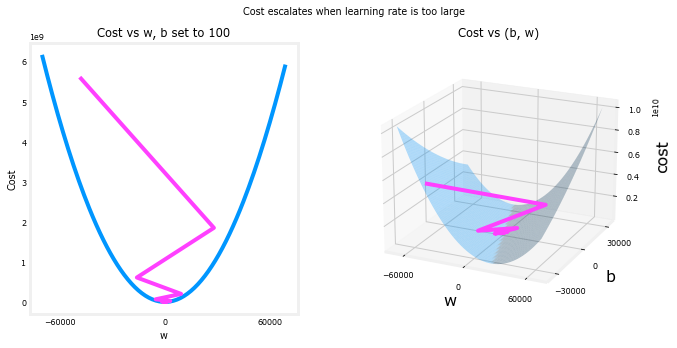

In [15]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()

Arriba, el gráfico de la izquierda muestra la progresión de $w$ en los primeros pasos del descenso de gradiente. $w$ oscila de positivo a negativo y el coste crece rápidamente. El descenso por gradiente está operando tanto en $w$ como en $b$ simultáneamente, por lo que se necesita el gráfico tridimensional de la derecha para obtener la imagen completa.


## Congratulations!
In this lab you:
- delved into the details of gradient descent for a single variable.
- developed a routine to compute the gradient
- visualized what the gradient is
- completed a gradient descent routine
- utilized gradient descent to find parameters
- examined the impact of sizing the learning rate